# Load The Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [6]:
# Reading the data
ford_df=pd.read_csv('Ford_stock_prices1.csv')
ford_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1981-01-02T00:00:00.000,0.160107,0.836350,0.836350,0.816074,0.816074,1647338
1,1981-01-05T00:00:00.000,0.165929,0.866762,0.871831,0.836350,0.836350,3948185
2,1981-01-06T00:00:00.000,0.167870,0.876900,0.887037,0.866762,0.866762,6234236
3,1981-01-07T00:00:00.000,0.163989,0.856625,0.856625,0.831281,0.856625,5782944
4,1981-01-08T00:00:00.000,0.158167,0.826212,0.851556,0.816074,0.851556,2717614


# Exploratory Data Analysis

In [7]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11067 entries, 0 to 11066
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11067 non-null  object 
 1   Adj Close  11067 non-null  float64
 2   Close      11067 non-null  float64
 3   High       11067 non-null  float64
 4   Low        11067 non-null  float64
 5   Open       11067 non-null  float64
 6   Volume     11067 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 605.4+ KB


In [8]:
ford_df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,11067.000000,11067.000000,11067.000000,11067.000000,11067.000000,1.106700e+04
mean,5.722742,11.055382,11.206046,10.907661,11.062496,2.806680e+07
std,3.833375,6.571572,6.668960,6.481015,6.573000,3.311867e+07
min,0.130759,0.643736,0.648804,0.638667,0.643736,4.762260e+05
25%,2.398964,7.321860,7.435908,7.207812,7.320930,6.586553e+06
50%,5.217931,10.410000,10.538004,10.270000,10.401147,1.325707e+07
75%,8.443502,13.503243,13.690000,13.345000,13.510000,4.080440e+07
max,20.632549,36.647751,37.300335,35.720394,36.819485,5.411756e+08


In [9]:
ford_df.shape

(11067, 7)

In [10]:
# Converting Date column into Date format

ford_df['Date'] = pd.to_datetime(ford_df['Date']).dt.date
ford_df['Date']=pd.to_datetime(ford_df['Date'],format='%d-%m-%Y')
ford_df.set_index('Date',inplace=True)

In [11]:
# Checking for null values
ford_df.isna().sum()

,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [12]:
# Checking for duplicate records
ford_df.duplicated().sum()

0

# Visualizations

In [13]:
num_data=ford_df.select_dtypes(include=['int','float']).columns
num_data

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

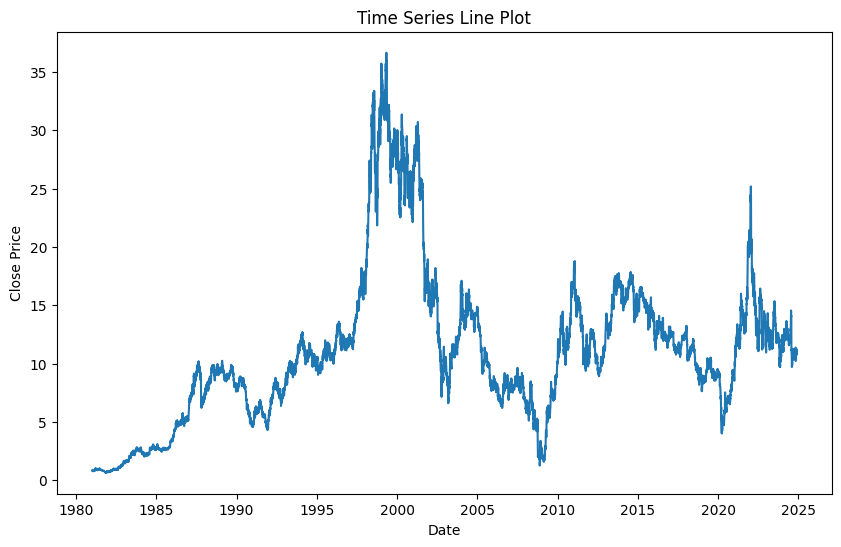

In [14]:
# Line Plot

plt.figure(figsize=(10,6))
plt.plot(ford_df['Close'])
plt.title('Time Series Line Plot')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

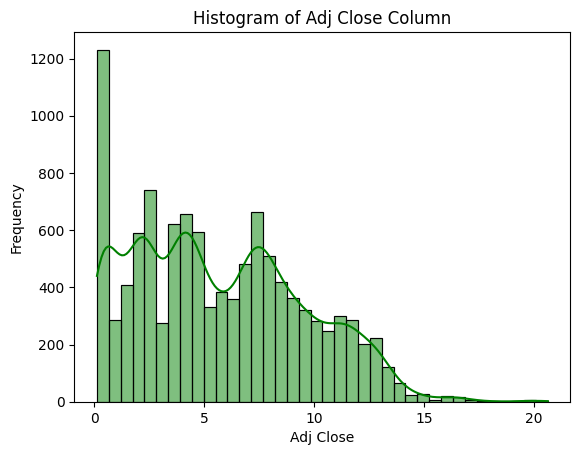



Adj Close if Positively Skewed




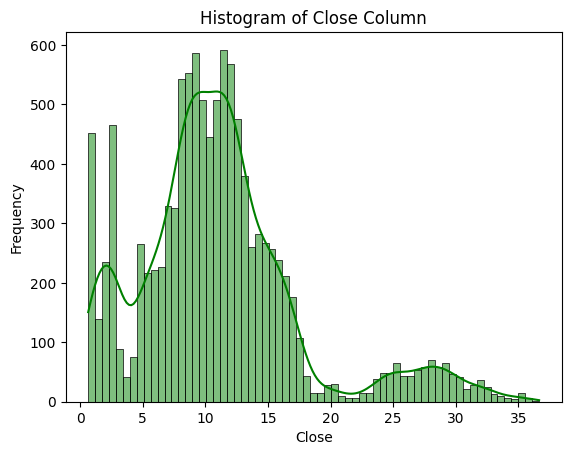



Close if Positively Skewed




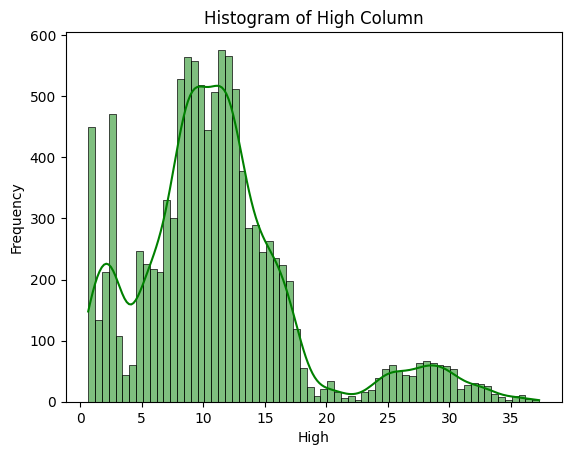



High if Positively Skewed




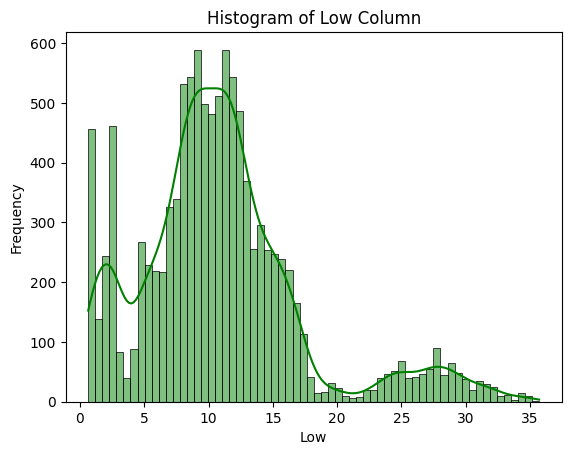



Low if Positively Skewed




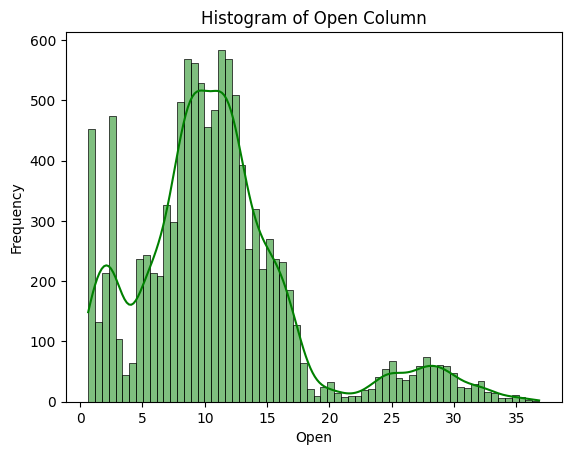



Open if Positively Skewed




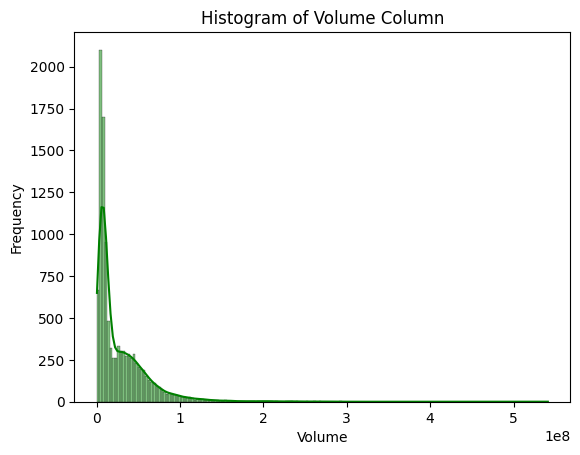



Volume if Positively Skewed




In [15]:
for colm in num_data:
    sns.histplot(ford_df[colm],kde=True,color='green',edgecolor='black')
    plt.title(f'Histogram of {colm} Column')
    plt.xlabel(colm)
    plt.ylabel('Frequency')
    plt.show()
    print('\n')
    if(np.mean(ford_df[f'{colm}']) < np.median(ford_df[f'{colm}'])):
        print(f'{colm} if Negatively Skewed')
    else:
        print(f'{colm} if Positively Skewed')
    print('\n')

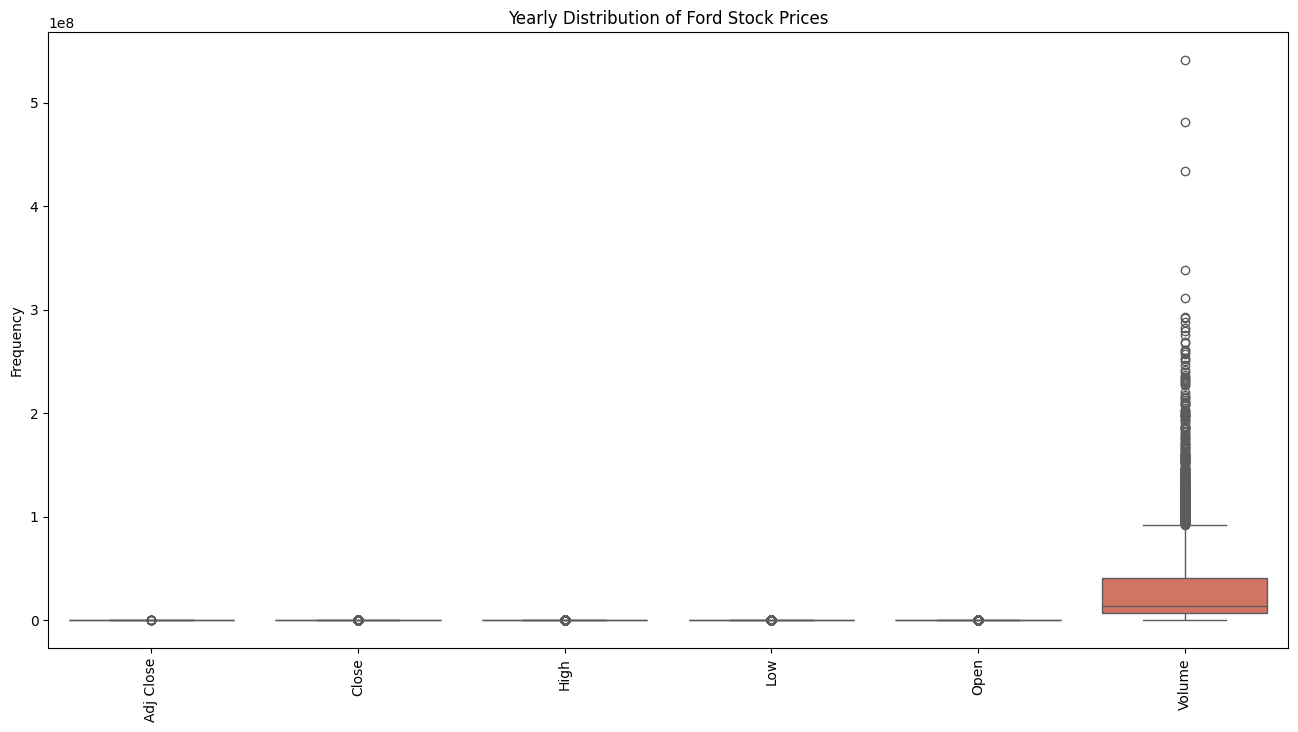

In [16]:
# Plotting a Box Plot
plt.figure(figsize=(16,8))
sns.boxplot(data=ford_df,palette='coolwarm')
plt.xticks(rotation=90,fontsize=10)
plt.title('Yearly Distribution of Ford Stock Prices')
plt.ylabel('Frequency')
plt.show()

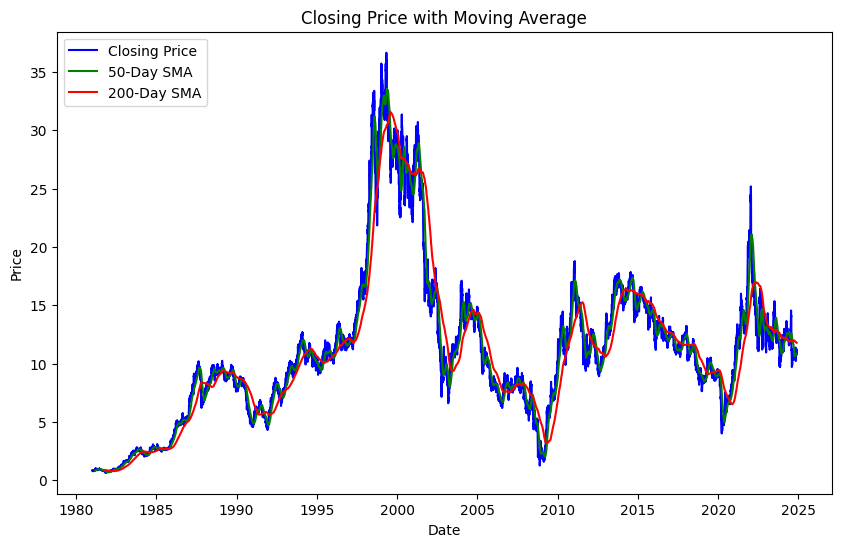

In [17]:
# Plot For Moving Avverage
ford_df['SMA_50']=ford_df['Close'].rolling(window=50).mean()
ford_df['SMA_200']=ford_df['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,6))
plt.plot(ford_df['Close'],label='Closing Price',color='b')
plt.plot(ford_df['SMA_50'],label='50-Day SMA',color='g')
plt.plot(ford_df['SMA_200'],label='200-Day SMA',color='r')
plt.title('Closing Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

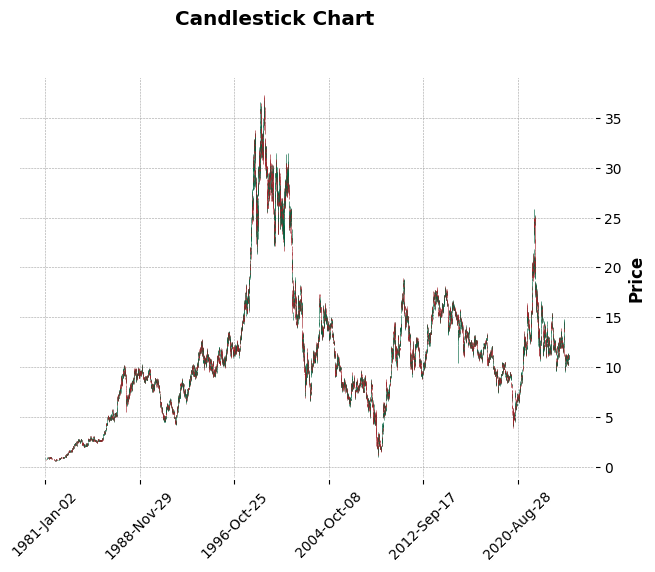

In [18]:
# Candlestick Plot
mpf.plot(ford_df, type='candle', style='charles', title='Candlestick Chart', ylabel='Price')


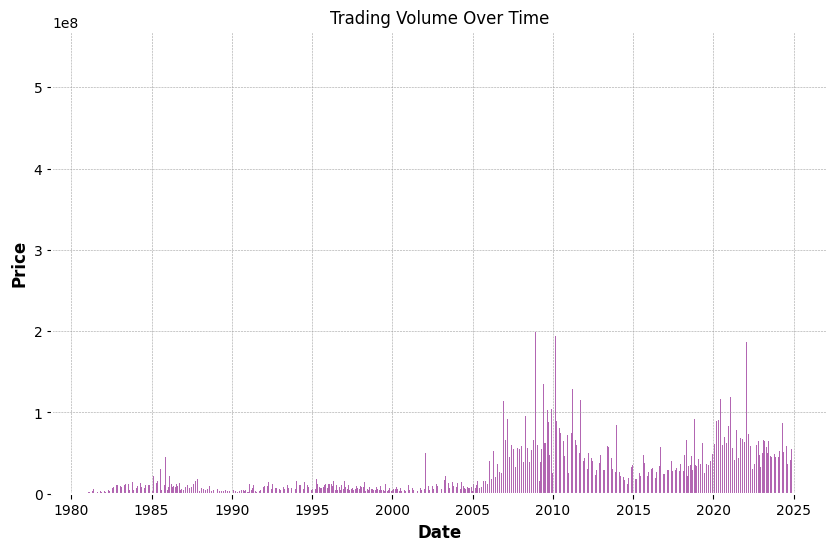

In [19]:
# Volume Analysis
plt.figure(figsize=(10,6))
plt.bar(ford_df.index,ford_df['Volume'],color='purple',alpha=0.6)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

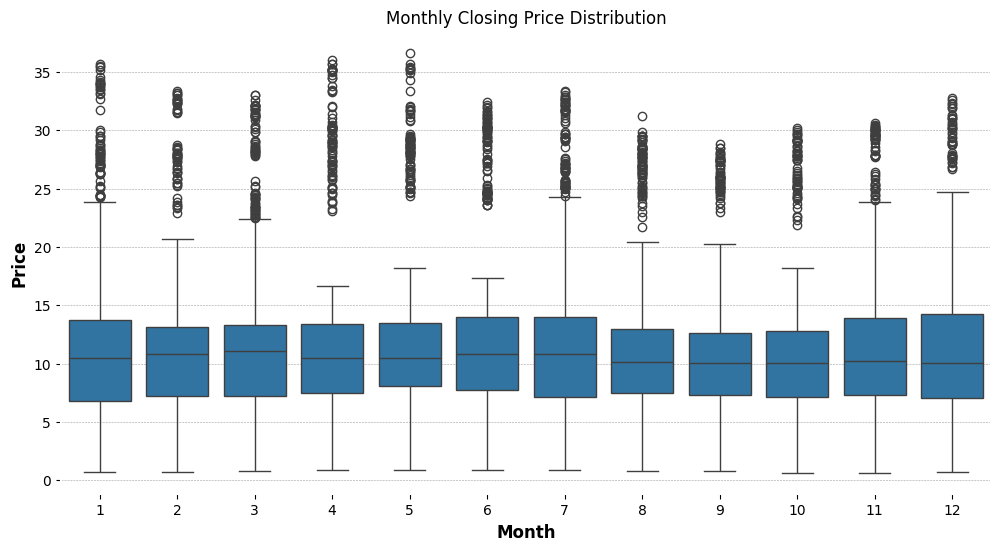

In [20]:
# Seasonality and Trends
ford_df['Month'] = ford_df.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Close', data=ford_df)
plt.title('Monthly Closing Price Distribution')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

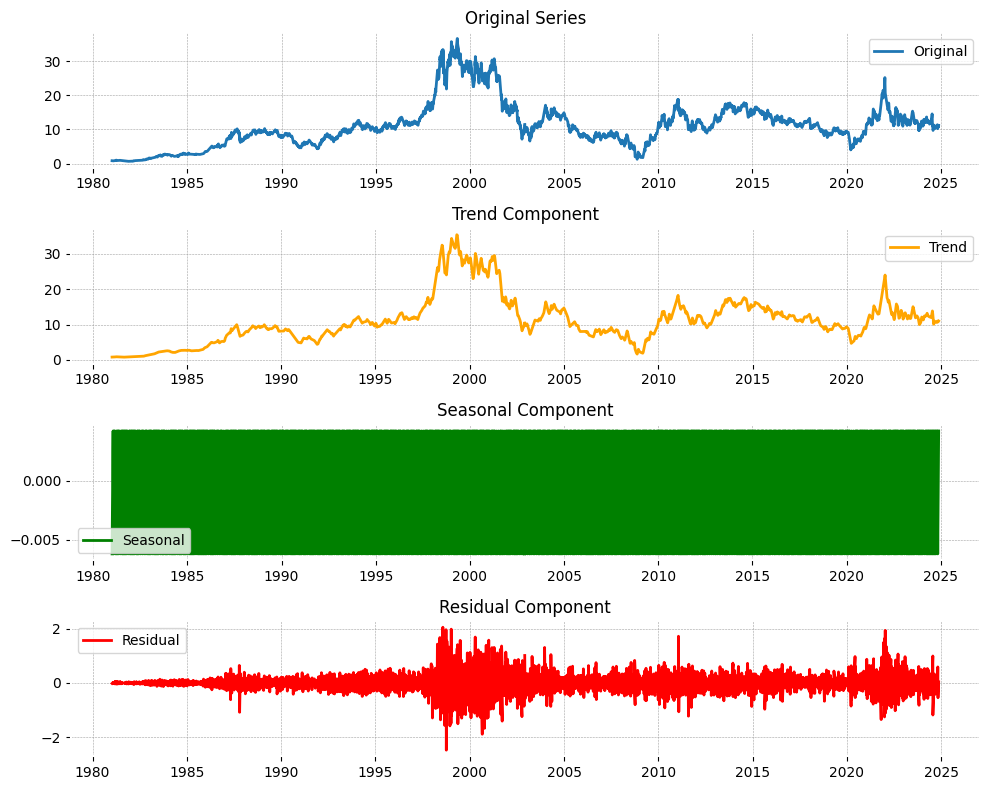

In [21]:
# Plotting the decomposed components

result = seasonal_decompose(ford_df['Close'], model='additive', period=12)
plt.figure(figsize=(10,8))

# Plot the original series
plt.subplot(411)
plt.plot(ford_df['Close'], label='Original')
plt.title('Original Series')
plt.legend(loc='best')

# Plot the trend component
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='best')

# Plot the seasonal component
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend(loc='best')

# Plot the residual component
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


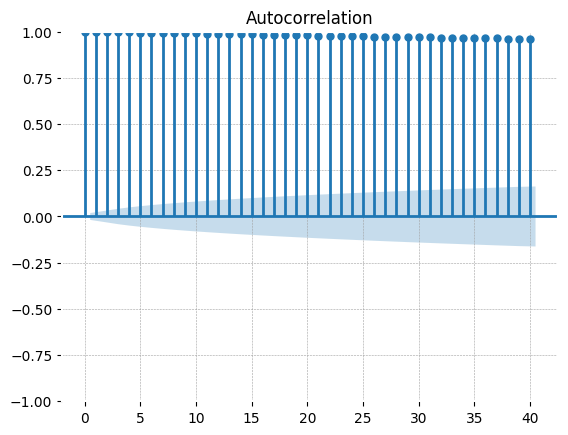

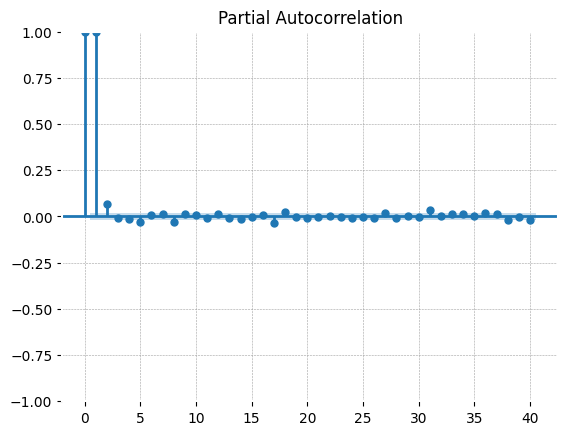

In [22]:
# ACF & PACF Plots
plot_acf(ford_df['Close'],lags=40)
plt.show()

plot_pacf(ford_df['Close'],lags=40)
plt.show()

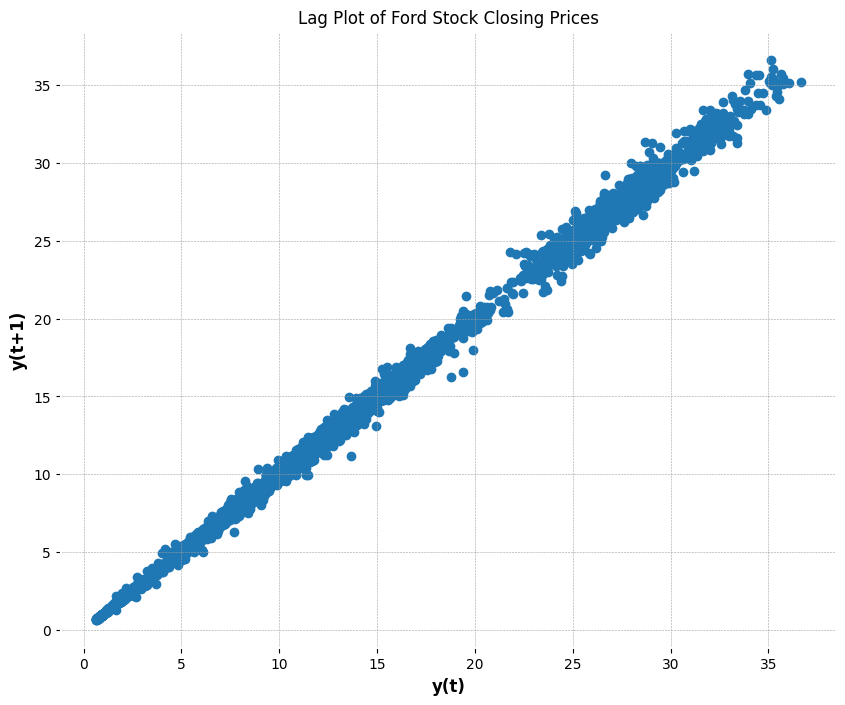

In [23]:
# Lag Plot
plt.figure(figsize=(10,8))
pd.plotting.lag_plot(ford_df['Close'])
plt.title('Lag Plot of Ford Stock Closing Prices')
plt.xlabel('y(t)')
plt.ylabel('y(t+1)')
plt.show()

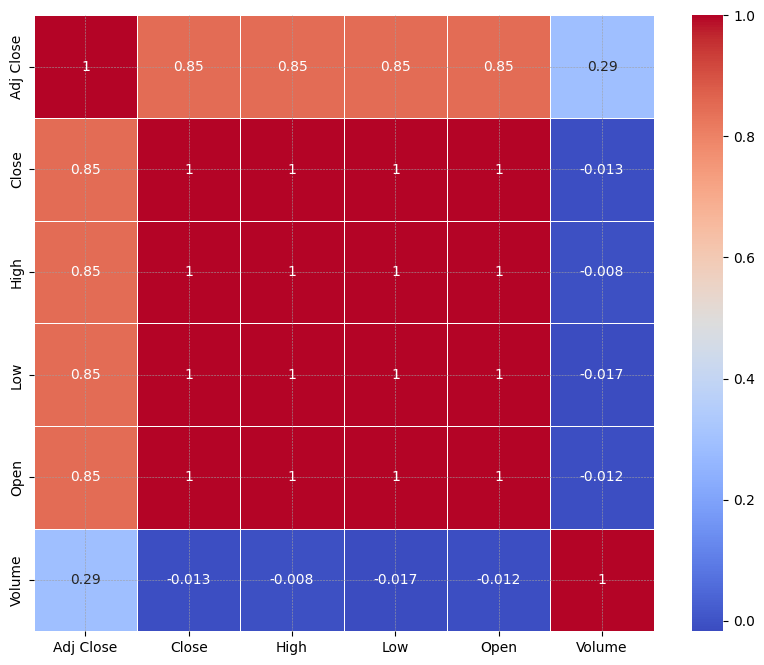

In [24]:
# Correlation heatMap
plt.figure(figsize=(10,8))
sns.heatmap(ford_df[num_data].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()


# Model Building

# Arima Model

In [25]:
# ARIMA Model
ford_arima=ford_df[['Close']]
ford_arima.shape

(11067, 1)

In [26]:
# Stationarity Check
adf=adfuller(ford_arima['Close'])
print('P-Value',adf[1])

P-Value 0.1311162772008806


In [27]:
# Applying the differencing since p-value is greater than 0.05
ford_diff=ford_arima.diff().dropna()
print('P-Value:',adfuller(ford_diff)[1])

P-Value: 4.046193767715632e-30


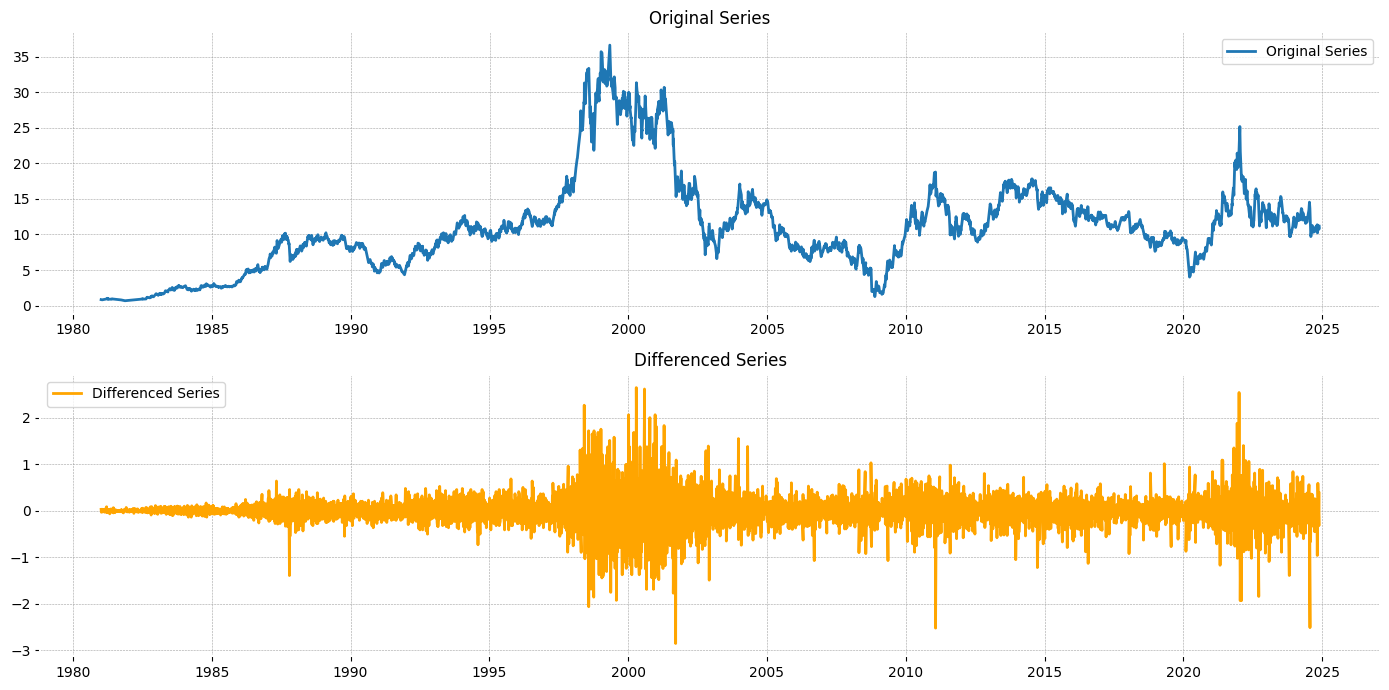

In [28]:
# Plot
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(ford_arima, label='Original Series')
plt.title('Original Series')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(ford_diff, label='Differenced Series', color='orange')
plt.title('Differenced Series')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
# Splitting the  Data
split_index=int(len(ford_diff)*0.80)
train_data=ford_diff[:split_index]
test_data=ford_diff[split_index:]

In [31]:
train_data.shape

(8852, 1)

In [32]:
test_data.shape

(2214, 1)

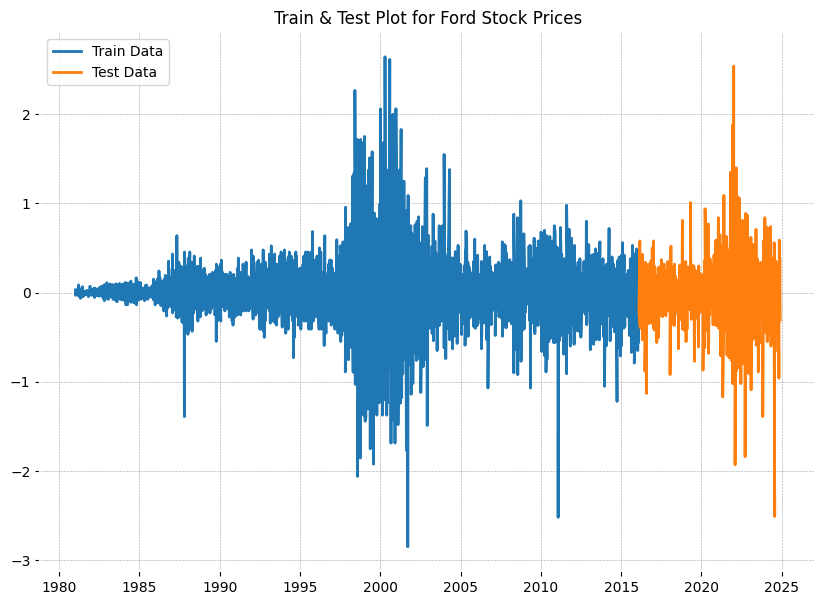

In [33]:
# Plotting the Train & Test Data
plt.figure(figsize=(10,7))
plt.plot(train_data,label='Train Data')
plt.plot(test_data,label='Test Data')
plt.title('Train & Test Plot for Ford Stock Prices')
plt.legend()
plt.show()

In [34]:
# Model Building
autoarima=auto_arima(train_data, trace=True,suppress_warnings=True)
autoarima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2787.825, Time=16.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2873.055, Time=1.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2790.598, Time=1.46 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2792.050, Time=1.84 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2871.217, Time=0.43 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2789.730, Time=10.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2794.504, Time=2.99 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=23.98 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2789.250, Time=16.86 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2792.548, Time=1.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2789.959, Time=10.76 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2791.247, Time=13.88 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2781.427, Time=26.86 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=2762.369, Time=24.50 sec
 ARIMA(4,0,2)(0,0,0)[0] interc

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8852
Model:               SARIMAX(2, 0, 5)   Log Likelihood               -1369.191
Date:                Fri, 27 Dec 2024   AIC                           2754.382
Time:                        13:11:49   BIC                           2811.089
Sample:                             0   HQIC                          2773.694
                               - 8852                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0556      0.009   -114.298      0.000      -1.074      -1.037
ar.L2         -0.9452      0.009   -104.237      0.000      -0.963      -0.927
ma.L1          0.9590      0.010     92.798      0.000       0.939       0.979
ma.L2          0.8593      0.012     73.532      0.000       0.836       0.882
ma.L3         -0.0594      0.010     -6.191      0.000      -0.078      -0.041
ma.L4          0.0539      0.008      6.756      0.000       0.038       0.070
ma.L5          0.0296      0.006      5.153      0.000       0.018       0.041
sigma2         0.0796      0.000    170.215      0.000       0.079       0.081
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             49885.98
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               4.77   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Fitting the ARIMA model using p,d,q as 2,0,5

arima_model=ARIMA(train_data,order=(2,0,5))
arima_model=arima_model.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8852
Model:                 ARIMA(2, 0, 5)   Log Likelihood               -1369.536
Date:                Fri, 27 Dec 2024   AIC                           2757.071
Time:                        13:16:59   BIC                           2820.867
Sample:                             0   HQIC                          2778.797
                               - 8852                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.003      0.396      0.692      -0.004       0.007
ar.L1         -1.0331      0.013    -77.609      0.000      -1.059      -1.007
ar.L2         -0.9136      0.013    -70.415      0.0

In [36]:
# Predict future values
future_steps = len(test_data)
start_index = len(train_data)
end_index = start_index + future_steps-1

In [37]:
arima_predictions = arima_model.predict(start=start_index, end=end_index)

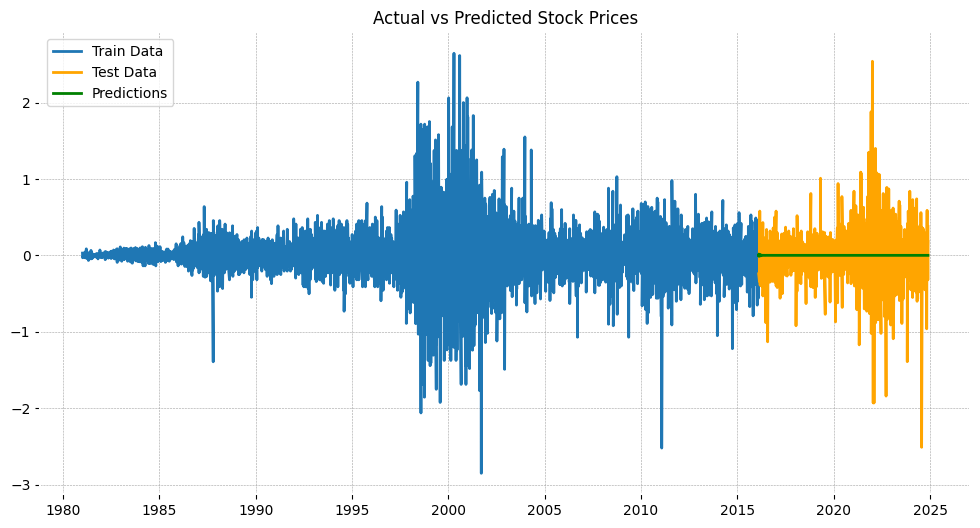

In [38]:
# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(test_data.index, arima_predictions, label='Predictions', color='green')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [39]:
# Evaluating Model Performance
arima_rmse=np.sqrt(mean_squared_error(test_data['Close'],arima_predictions))
print(arima_rmse)

0.2808589831144855


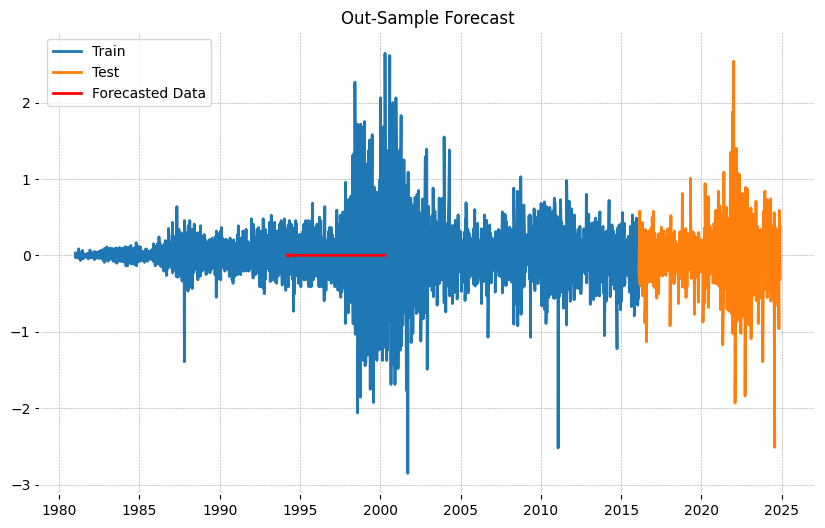

In [40]:
# Forecast using ARIMA Model

arima_forecast = arima_model.forecast(steps=len(test_data))

# Plot actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train')
plt.plot(test_data,label='Test')
plt.plot(range(len(train_data), len(train_data) + len(test_data)), arima_forecast, label='Forecasted Data', color='red')
plt.title('Out-Sample Forecast')
plt.legend()
plt.show()

# SARIMA Model

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
sarima_model=SARIMAX(train_data,order=(2,0,5),seasonal_order=(2,0,5,12))
sarima_result=sarima_model.fit()
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 8852
Model:             SARIMAX(2, 0, 5)x(2, 0, 5, 12)   Log Likelihood               -1364.867
Date:                            Fri, 27 Dec 2024   AIC                           2759.734
Time:                                    13:22:35   BIC                           2866.060
Sample:                                         0   HQIC                          2795.944
                                           - 8852                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0681      0.007   -145.013      0.000      -1.082      -1.054
ar.L2         -0.9520      0.007   -128.480      0.000      -0.967      -0.937
ma.L1          0.9714      0.009    110.272      0.000       0.954       0.989
ma.L2          0.8675      0.011     80.390      0.000       0.846       0.889
ma.L3         -0.0569      0.010     -5.799      0.000      -0.076      -0.038
ma.L4          0.0559      0.008      6.858      0.000       0.040       0.072
ma.L5          0.0333      0.006      5.751      0.000       0.022       0.045
ar.S.L12      -0.0241      2.444     -0.010      0.992      -4.813       4.765
ar.S.L24       0.2162      0.722      0.300      0.765      -1.198       1.631
ma.S.L12       0.0329      2.444      0.013      0.989      -4.757       4.823
ma.S.L24      -0.2111      0.737     -0.286      0.775      -1.656       1.234
ma.S.L36      -0.0267      0.018     -1.490      0.136      -0.062       0.008
ma.S.L48      -0.0130      0.059     -0.220      0.826      -0.129       0.103
ma.S.L60       0.0070      0.044      0.158      0.874      -0.080       0.094
sigma2         0.0797      0.000    167.449      0.000       0.079       0.081
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             49909.12
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               4.77   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
# Predictions
future_steps1 = len(test_data)
start_index = len(train_data)
end_index = start_index + future_steps1 - 1

sarima_predictions = sarima_result.predict(start=start_index, end=end_index)

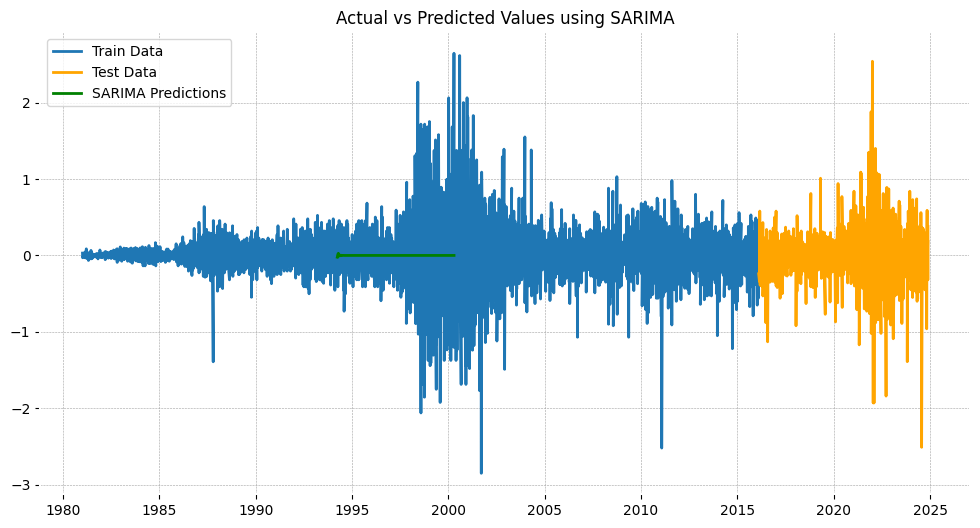

In [44]:
# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(range(start_index, end_index + 1), sarima_predictions, label='SARIMA Predictions', color='green')
plt.title('Actual vs Predicted Values using SARIMA')
plt.legend()
plt.show()

In [45]:
# Number of steps to forecast into the future
future_steps = 30
forecast = sarima_result.forecast(steps=future_steps)

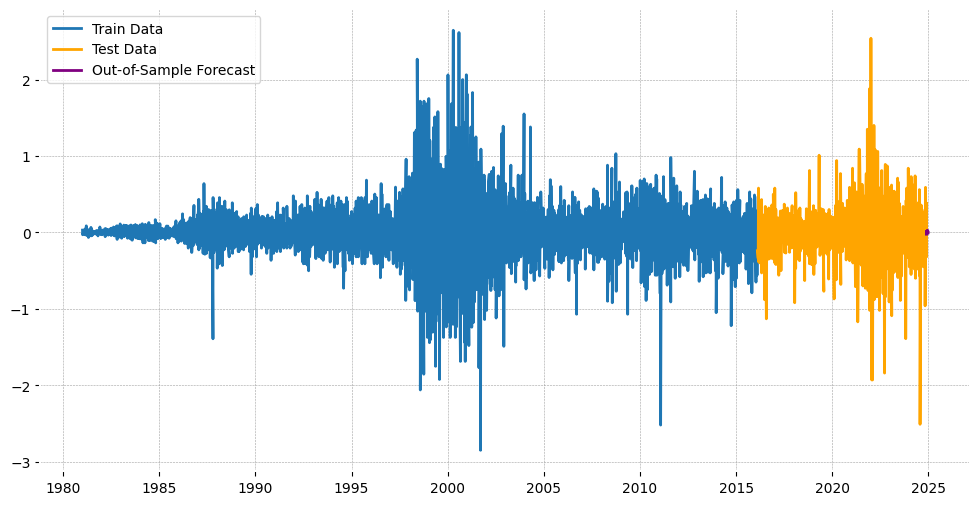

In [46]:
# Plotting the forecast
forecast_index = pd.date_range(start=test_data.index[-1] + pd.Timedelta(1, unit='D'), periods=future_steps)
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(forecast_index, forecast, label='Out-of-Sample Forecast', color='purple')
plt.legend()
plt.show()

In [47]:
# Calculate RMSE
sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_predictions))
print(f"SARIMA RMSE: {sarima_rmse}")

SARIMA RMSE: 0.2808615714881943


# LSTM Model Building

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Input,Dropout
from sklearn.preprocessing import  MinMaxScaler
import math

In [49]:
lstm_df=ford_df[['Close']]
lstm_df.head()

,Close
Date,
1981-01-02,0.836350
1981-01-05,0.866762
1981-01-06,0.876900
1981-01-07,0.856625
1981-01-08,0.826212


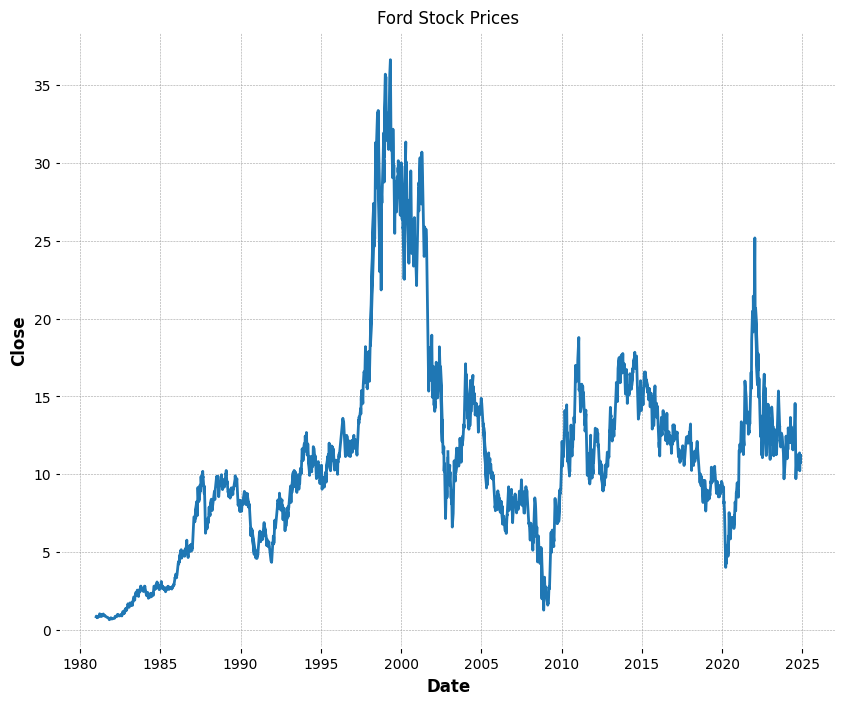

In [50]:
# Plot for the Closing column
plt.figure(figsize=(10,8))
plt.plot(lstm_df['Close'])
plt.title('Ford Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

In [51]:
# Normalize the Data
prices=lstm_df[['Close']]
prices

,Close
Date,
1981-01-02,0.836350
1981-01-05,0.866762
1981-01-06,0.876900
1981-01-07,0.856625
1981-01-08,0.826212
...,...
2024-11-18,11.210000
2024-11-19,11.050000
2024-11-20,10.730000


In [52]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_prices=scaler.fit_transform(prices)
scaled_prices

array([[0.00534979],
       [0.00619448],
       [0.00647606],
       ...,
       [0.28014274],
       [0.28208699],
       [0.29264137]])

In [53]:
# Split the Data into Training & Testing
train_size=int(len(scaled_prices)*0.80)
train_lstm=scaled_prices[:train_size]
test_lstm=scaled_prices[train_size:]

In [54]:
# Defining the features and labels
def create_dataset(prices, time_step=60):
    X, Y = [], []
    for i in range(len(prices) - time_step):
        X.append(prices[i:i + time_step, 0])
        Y.append(prices[i + time_step, 0])
    return np.array(X), np.array(Y)

In [55]:
# Prepare training and testing datasets
time_step = 60  # Using 60 as the time step
x_train, y_train = create_dataset(train_lstm, time_step)
x_test, y_test = create_dataset(test_lstm, time_step)

In [56]:
# Reshape into 3D array for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [57]:
# Building the LSTM Model
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
lstm_model.add(LSTM(units=50,return_sequences=False))
lstm_model.add(Dense(units=25))
lstm_model.add(Dense(units=1))

In [58]:
lstm_model.compile(optimizer='adam',loss='mean_squared_error')

In [59]:
lstm_model.fit(x_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - loss: 0.0130
Epoch 2/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - loss: 3.0877e-04
Epoch 3/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - loss: 2.7694e-04
Epoch 4/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - loss: 2.1666e-04
Epoch 5/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - loss: 1.9751e-04
Epoch 6/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - loss: 1.8517e-04
Epoch 7/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - loss: 1.8958e-04
Epoch 8/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - loss: 1.4368e-04
Epoch 9/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - loss: 1.4107e-04
Epoch 10/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - loss: 1.1085e-04
Epoch 11/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 1.1340e-04
Epoch 12/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - loss: 1.0777e-04
Epoch 13/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - loss: 1.2382e-04
Epoch 14/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/s

In [60]:
# Make predictions
train_predict = lstm_model.predict(x_train)
test_predict = lstm_model.predict(x_test)

275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [61]:
# Inverse transform to get actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train]).T
y_test = scaler.inverse_transform([y_test]).T

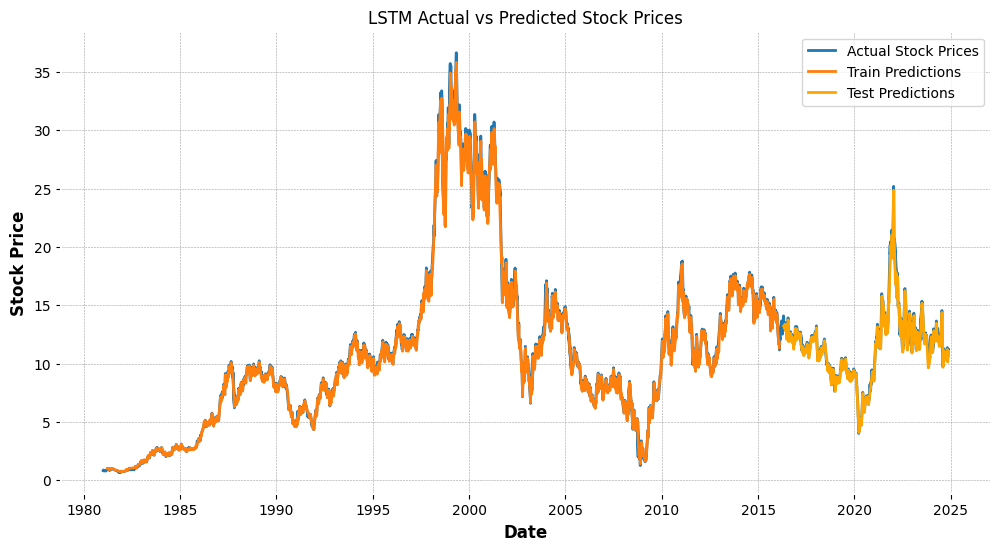

In [63]:
# Plot the Result

plt.figure(figsize=(12, 6))
plt.plot(prices.index, scaler.inverse_transform(scaled_prices), label='Actual Stock Prices')
train_plot_index = prices.index[time_step:len(train_predict) + time_step]
plt.plot(train_plot_index, train_predict, label='Train Predictions')
test_plot_index = prices.index[len(train_predict) + (2 * time_step):]
plt.plot(test_plot_index, test_predict, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('LSTM Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [64]:
# Convert test_data to a NumPy array if it's not already
test_data = test_data.values

In [65]:
# Define the time step (this should match the time step used during training)
time_step = 10

In [66]:
# Get the last sequence from the test data
last_sequence = test_data[-time_step:]

In [67]:
# Prepare to store future predictions
future_steps = 30
future_predictions = []

In [68]:
# Predict future stock prices
for _ in range(future_steps):
    # Reshape the last sequence for LSTM input
    pred_input = last_sequence.reshape((1, time_step, 1))  # Shape: (batch_size, time_step, features)

    # Make prediction
    future_pred = lstm_model.predict(pred_input)

    # Append the prediction to the future predictions list
    future_predictions.append(future_pred[0, 0])

    # Update the last sequence by appending the new prediction
    last_sequence = np.append(last_sequence[1:], future_pred)  # Remove the first element and add the new prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

In [71]:
# Transform future predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

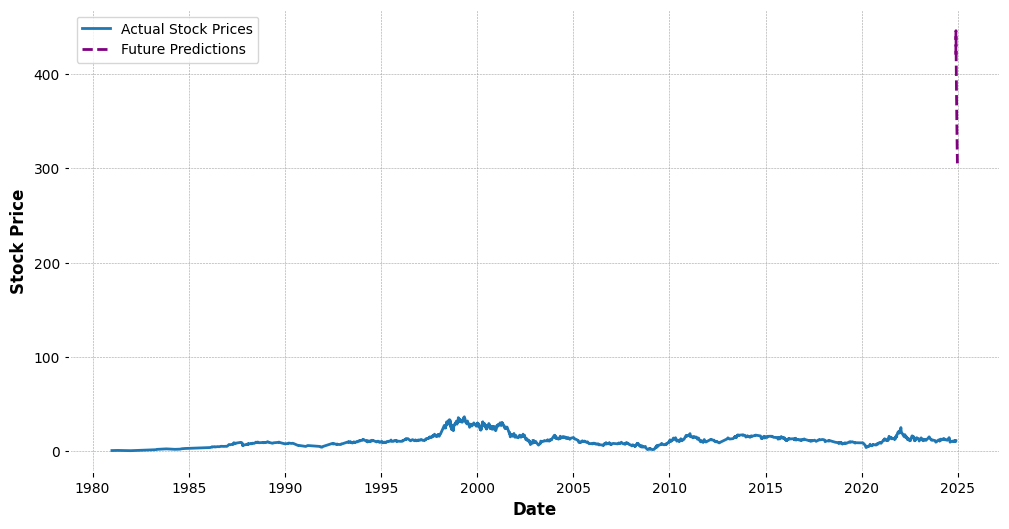

In [72]:
# Plot future predictions
future_dates = pd.date_range(prices.index[-1] + pd.Timedelta(days=1), periods=future_steps)
plt.figure(figsize=(12, 6))
plt.plot(prices.index, scaler.inverse_transform(scaled_prices), label='Actual Stock Prices')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--', color='purple')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [73]:
# Calculate RMSE for train and test predictions
lstm_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f"Test RMSE: {lstm_rmse}")

Test RMSE: 0.30732156411125255


# fbprophet Model

In [74]:
from prophet import Prophet

In [81]:
pr_df=pd.read_csv('Ford_stock_prices1.csv')
pr_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1981-01-02T00:00:00.000,0.160107,0.836350,0.836350,0.816074,0.816074,1647338
1,1981-01-05T00:00:00.000,0.165929,0.866762,0.871831,0.836350,0.836350,3948185
2,1981-01-06T00:00:00.000,0.167870,0.876900,0.887037,0.866762,0.866762,6234236
3,1981-01-07T00:00:00.000,0.163989,0.856625,0.856625,0.831281,0.856625,5782944
4,1981-01-08T00:00:00.000,0.158167,0.826212,0.851556,0.816074,0.851556,2717614


In [82]:
# Removing Unwanted Columns
pr_df.drop(['Open','High','Low','Volume','Adj Close'],axis=1,inplace=True)
pr_df.head()

,Date,Close
0,1981-01-02T00:00:00.000,0.836350
1,1981-01-05T00:00:00.000,0.866762
2,1981-01-06T00:00:00.000,0.876900
3,1981-01-07T00:00:00.000,0.856625
4,1981-01-08T00:00:00.000,0.826212


In [85]:
# Converting Date column into Date format
pr_df['Date']=pd.to_datetime(pr_df.Date)
pr_df.dtypes

,0
Date,datetime64[ns]
Close,float64


In [86]:
pr_df = pr_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [87]:
# Splitting the data into training & testing
train_p=int(len(pr_df)*0.80)
train_data1=pr_df[:train_p]
test_data1=pr_df[train_p:]

In [88]:
# Fitting the model
pr_model=Prophet(daily_seasonality=True)
pr_model.fit(train_data1)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmrvhuiqk/f_5go_9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmrvhuiqk/ohpxhuk2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69204', 'data', 'file=/tmp/tmpmrvhuiqk/f_5go_9i.json', 'init=/tmp/tmpmrvhuiqk/ohpxhuk2.json', 'output', 'file=/tmp/tmpmrvhuiqk/prophet_model3qz9kn6y/prophet_model-20241227140851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [89]:
# Predictions on Test Data
pred=pr_model.predict(test_data1)
pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2209,2024-11-18,29.879550,-27.802777,87.677822,-27.373629,88.878494,-0.807278,-0.807278,-0.807278,-0.307234,-0.307234,-0.307234,-0.013451,-0.013451,-0.013451,-0.486593,-0.486593,-0.486593,0.0,0.0,0.0,29.072272
2210,2024-11-19,29.883334,-28.167369,88.790177,-27.376591,88.952704,-0.790443,-0.790443,-0.790443,-0.307234,-0.307234,-0.307234,-0.007281,-0.007281,-0.007281,-0.475928,-0.475928,-0.475928,0.0,0.0,0.0,29.092891
2211,2024-11-20,29.887117,-27.514808,88.200283,-27.379552,89.014832,-0.776499,-0.776499,-0.776499,-0.307234,-0.307234,-0.307234,-0.004047,-0.004047,-0.004047,-0.465218,-0.465218,-0.465218,0.0,0.0,0.0,29.110618
2212,2024-11-21,29.890900,-27.154325,88.674903,-27.382514,89.076402,-0.772399,-0.772399,-0.772399,-0.307234,-0.307234,-0.307234,-0.010360,-0.010360,-0.010360,-0.454805,-0.454805,-0.454805,0.0,0.0,0.0,29.118501
2213,2024-11-22,29.894684,-26.758751,88.146826,-27.385475,89.137973,-0.793932,-0.793932,-0.793932,-0.307234,-0.307234,-0.307234,-0.041670,-0.041670,-0.041670,-0.445028,-0.445028,-0.445028,0.0,0.0,0.0,29.100751


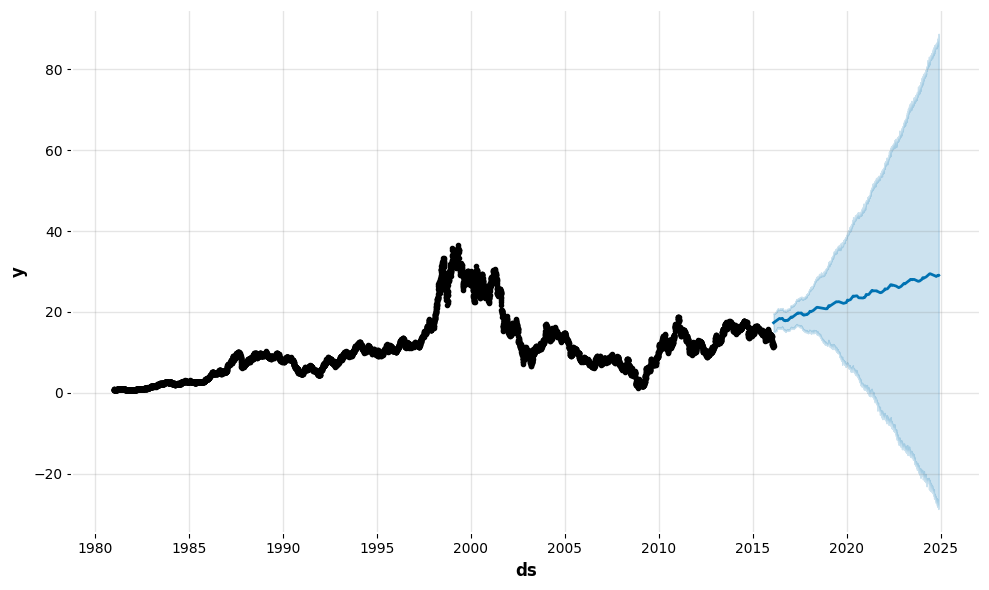

In [90]:
pr_model.plot(pred)
plt.show()

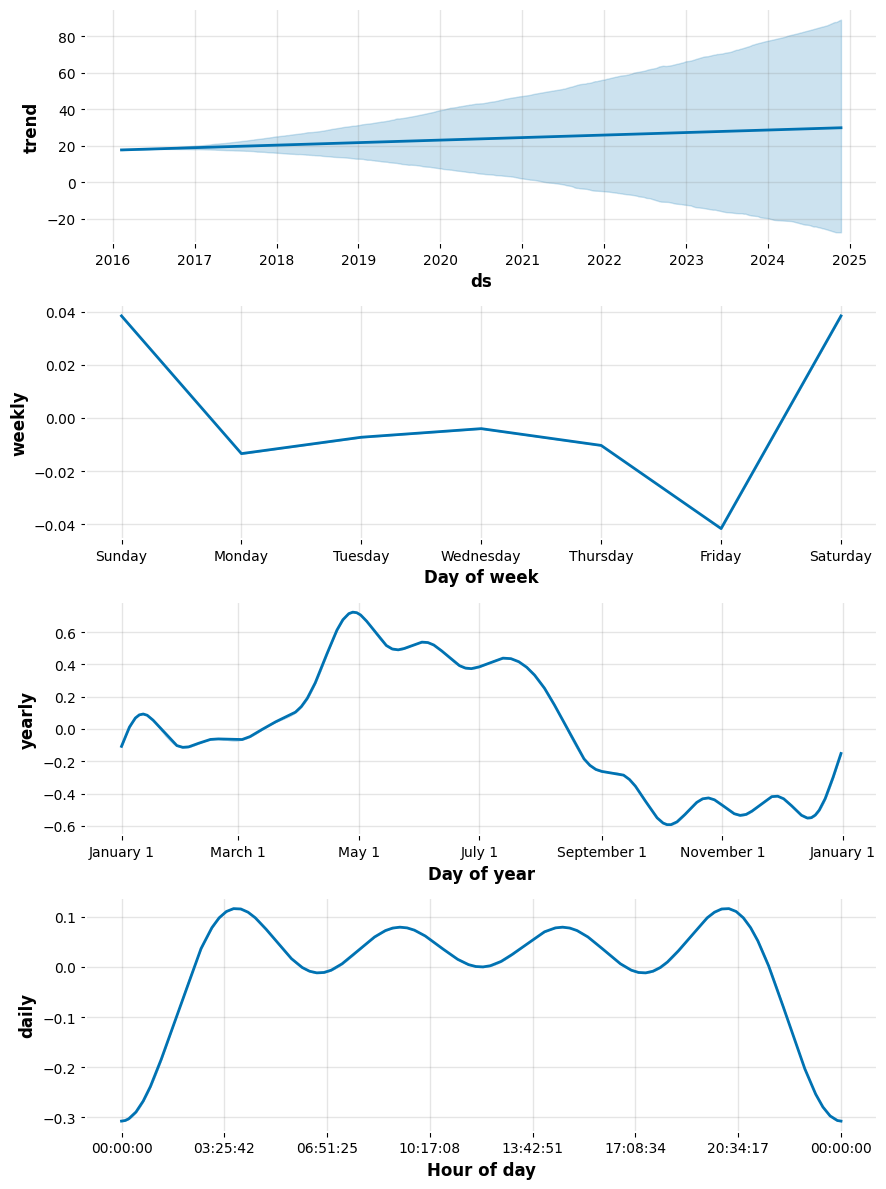

In [91]:
pr_model.plot_components(pred)
plt.show()

In [92]:
# RMSE Score
pr_rmse=np.sqrt(mean_squared_error(y_true = test_data1["y"], y_pred = pred['yhat']))
print(f'RMSE score is:{pr_rmse}')

RMSE score is:12.613974040357453


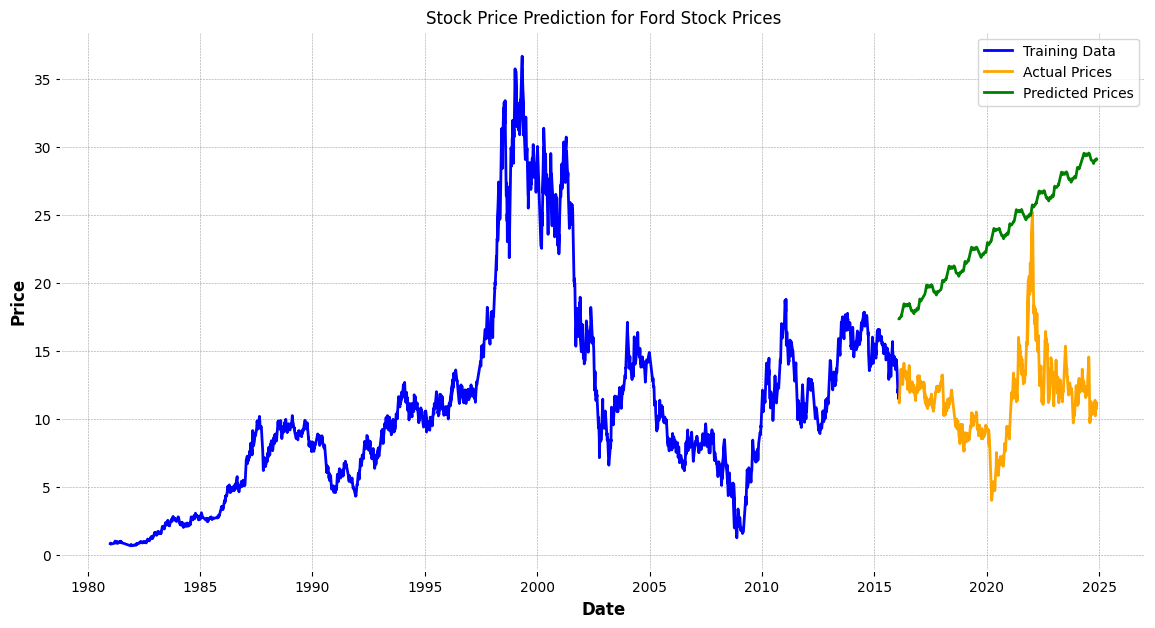

In [93]:
plt.figure(figsize=(14, 7))
plt.plot(train_data1['ds'], train_data1['y'], label='Training Data', color='blue')
plt.plot(test_data1['ds'], test_data1['y'], label='Actual Prices', color='orange')
plt.plot(pred['ds'], pred['yhat'], label='Predicted Prices', color='green')
plt.title('Stock Price Prediction for Ford Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# ETS Smoothing

In [94]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [95]:
ets_df=ford_df[['Close']]

In [96]:
# Split the data into training and testing sets
train_size2 = int(len(ets_df) * 0.8)
train_data2, test_data2 = ets_df[:train_size2], ets_df[train_size2:]

In [97]:
# Extract the Close price for training and testing
train_close = train_data2['Close']
test_close = test_data2['Close']

In [98]:
# Apply ETS model (additive trend and seasonality)
ets_model = ExponentialSmoothing(train_close, trend="add", seasonal="add", seasonal_periods=12)
ets_fit = ets_model.fit()

In [99]:
print(ets_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                 8853
Model:             ExponentialSmoothing   SSE                            709.524
Optimized:                         True   AIC                         -22312.243
Trend:                         Additive   BIC                         -22198.827
Seasonal:                      Additive   AICC                        -22312.166
Seasonal Periods:                    12   Date:                 Fri, 27 Dec 2024
Box-Cox:                          False   Time:                         14:11:04
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9044008                alpha                 True
smoothing_trend          

In [100]:
# Forecast on the test set
forecast = ets_fit.forecast(len(test_close))

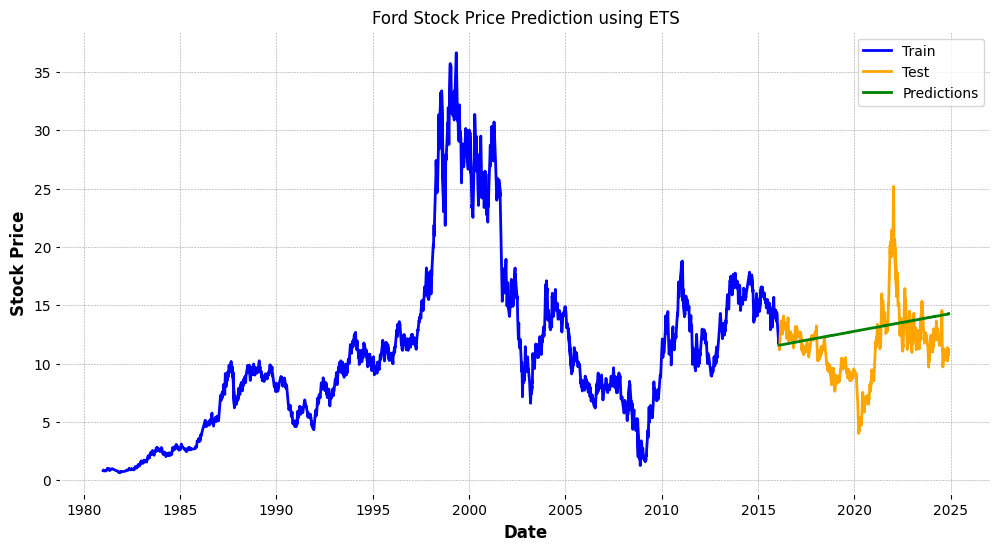

In [101]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data2.index, train_close, label='Train', color='blue')
plt.plot(test_data2.index, test_close, label='Test', color='orange')
plt.plot(test_data2.index, forecast, label='Predictions', color='green')
plt.title('Ford Stock Price Prediction using ETS')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [102]:
# Calculate RMSE
ets_rmse = np.sqrt(mean_squared_error(test_close, forecast))
print(f"RMSE Score: {ets_rmse}")

RMSE Score: 3.1267511316310337


# GRU Model Building

In [103]:
from tensorflow.keras.layers import GRU, Dropout, Dense

In [104]:
gru_df=ford_df[['Close']]

In [105]:
# Normalizing the Data
scaler_gru=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler_gru.fit_transform(gru_df)

In [106]:
# Splitting the Data
sequence_length=60
train_size3=int(len(scaled_data)*0.80)

train_data3=scaled_data[:train_size3]
test_data3=scaled_data[train_size3:]

In [107]:
# Creating a Sequence for training data
x1_train,y1_train=[],[]
for i in range(sequence_length,len(test_data3)):
    x1_train.append(train_data3[i-sequence_length:i])
    y1_train.append(train_data3[i])
x1_train,y1_train=np.array(x1_train),np.array(y1_train)

In [108]:
# Creating a Sequence for testing data
x1_test,y1_test=[],[]
for i in range(sequence_length,len(test_data3)):
    x1_test.append(test_data3[i-sequence_length:i])
    y1_test.append(test_data3[i])
x1_test,y1_test=np.array(x1_test),np.array(y1_test)

In [109]:
# Model building

gru_model=Sequential()
# 1st GRU Layer with dropout
gru_model.add(GRU(50,return_sequences=True,input_shape=(x1_train.shape[1],1)))
gru_model.add(Dropout(0.2))
# 2nd GRU Layer with dropout
gru_model.add(GRU(50,return_sequences=True))
gru_model.add(Dropout(0.2))
# 3rd GRU Layer with dropout
gru_model.add(GRU(50,return_sequences=True))
gru_model.add(Dropout(0.2))
# 4th GRU Layer with dropout
gru_model.add(GRU(50))
gru_model.add(Dropout(0.2))

gru_model.add(Dense(1))

In [110]:
# Compiling
gru_model.compile(optimizer='adam',loss='mean_squared_error')

In [111]:
# Fit the model
gru_fit=gru_model.fit(x1_train,y1_train,batch_size=32,epochs=30,validation_data=(x1_test,y1_test))

Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - loss: 0.0034 - val_loss: 2.9517e-04
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - loss: 3.5862e-04 - val_loss: 3.9813e-04
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - loss: 2.5070e-04 - val_loss: 2.9415e-04
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - loss: 2.1266e-04 - val_loss: 3.0243e-04
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - loss: 2.0557e-04 - val_loss: 3.6965e-04
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - loss: 1.7319e-04 - val_loss: 2.9756e-04
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - loss: 1.9984e-04 - val_loss: 2.7284e-04
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - loss: 1.5621e-04 - val_loss: 5.7458e-04
Epoch 9/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - loss: 2.0473e-04 - val_loss: 5.5179e-04
Epoch 10/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - loss: 1.9126e-04 - val_loss: 2.8054e-04
Epoch 11/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step

In [112]:
predictions1 = gru_model.predict(x1_test)
predictions1 = scaler_gru.inverse_transform(predictions1)  # Scale back to original values
y1_test = scaler_gru.inverse_transform(y1_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step


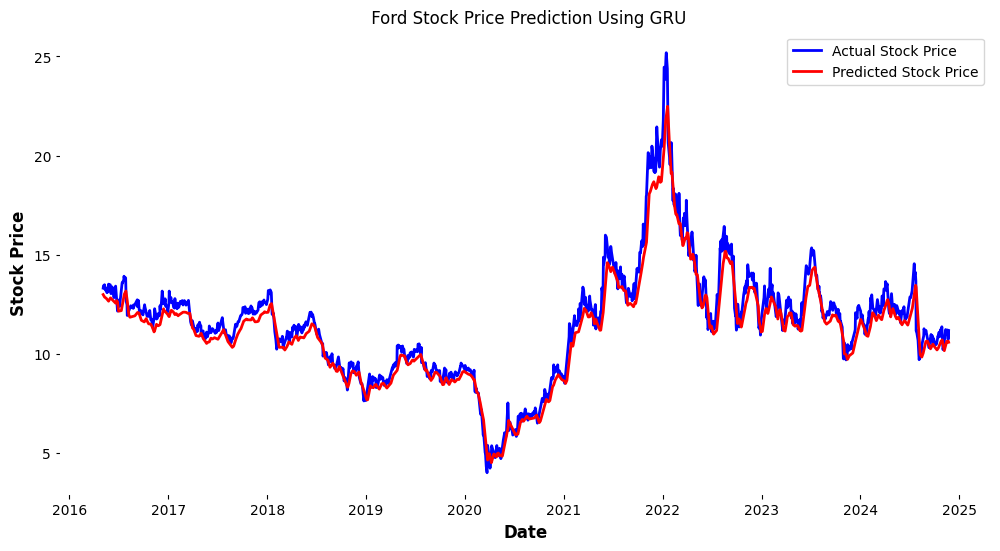

In [113]:
plt.figure(figsize=(12, 6))
plt.plot(gru_df.index[-len(y1_test):], y1_test, label="Actual Stock Price", color="blue")
plt.plot(gru_df.index[-len(predictions1):], predictions1, label="Predicted Stock Price", color="red")
plt.title(" Ford Stock Price Prediction Using GRU")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

In [114]:
# RMSE
gru_rmse = np.sqrt(mean_squared_error(y1_test, predictions1))
print(f"RMSE Score: {gru_rmse}")

RMSE Score: 0.6927833078963731


# Comparing the Results

In [115]:
# Comparing the Results

data={'Model':pd.Series(['arima_model','sarima_model','lstm_model','pr_rmse',
                         'ets_rmse','gru_rmse']),
      'RMSE Values':pd.Series([arima_rmse,sarima_rmse,lstm_rmse,pr_rmse
                               ,ets_rmse,gru_rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE Values'])


,Model,RMSE Values
0,arima_model,0.280859
1,sarima_model,0.280862
2,lstm_model,0.307322
5,gru_rmse,0.692783
4,ets_rmse,3.126751
3,pr_rmse,12.613974
